<a href="https://colab.research.google.com/github/Prem-Chand-Dindukurthi/1999/blob/master/ADS_Exp_2_prem_chand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries
 

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# My dataset name is "fifa 2018 stats.csv". So I am loading the file 
 

In [208]:
df=pd.read_csv('fifa 2018 stats.csv')
print(df.head())
print(df.shape)
print(df.columns)

         Date          Team  ... Own goals  Own goal Time
0  14-06-2018        Russia  ...       NaN            NaN
1  14-06-2018  Saudi Arabia  ...       NaN            NaN
2  15-06-2018         Egypt  ...       NaN            NaN
3  15-06-2018       Uruguay  ...       NaN            NaN
4  15-06-2018       Morocco  ...       1.0           90.0

[5 rows x 27 columns]
(128, 27)
Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')


# Filling the null values. 



In [209]:
df.fillna({
    'Own goals':0
},inplace=True)


## I am trying to predict the result of match. So I need to convert the numbers into percentage so that they will be useful. I am adding them to my dataframe so that they would be useful. 

In [210]:
k=(df['On-Target']/df['Attempts'])*100
df['On target %']=k
k=(df['Blocked']/df['Attempts'])*100
df['Blocked %']=k

## Here in my dataset I was able to see that there were things like Goals scored, penalty shoot out etc. But we actually don't have the result of their matches i.e win or loss or drawn. So I am actually trying to find the result with available dataset. 


In [211]:
p=df['Team']
pp=[]
for i in range(0,len(p),2):
  one=df['Goal Scored'][i]
  two=df['Goal Scored'][i+1]
  if one!=two:
    if one>two:
      pp.append('win')
      pp.append('loss')
    else:
      pp.append('loss')
      pp.append('win')
  else:
    if df['PSO'][i]=='Yes':
      one=df['Goals in PSO'][i]
      two=df['Goals in PSO'][i+1]
      if one>two:
        pp.append('win')
        pp.append('loss')
      else:
        pp.append('loss')
        pp.append('win')
    else:
      pp.append('drawn')
      pp.append('drawn')
df['Result']=pp
print(df.columns)
print(df.head())

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time', 'On target %',
       'Blocked %', 'Result'],
      dtype='object')
         Date          Team      Opponent  ...  On target %  Blocked %  Result
0  14-06-2018        Russia  Saudi Arabia  ...    53.846154  23.076923     win
1  14-06-2018  Saudi Arabia        Russia  ...     0.000000  50.000000    loss
2  15-06-2018         Egypt       Uruguay  ...    37.500000  25.000000    loss
3  15-06-2018       Uruguay         Egypt  ...    28.571429  28.571429     win
4  15-06-2018       Morocco          Iran  ...    23.076923  30.769231    loss

[5 rows x 30 columns]


## Now we have the result of the matches like wins, losses and drawns. But all the machine learning models will work best with numbers. So now we need to get all the result getting converted into numbers. But we need to note that after getting converted to numbers they will be as 0,1,2. Here label encoder works in the alphabetical ordering. So drawn=0, loss=1 and win=2. 


In [212]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Result']=le.fit_transform(df['Result'])
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,On target %,Blocked %,Result
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,0.0,NaN,53.846154,23.076923,2
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,0.0,NaN,0.000000,50.000000,1
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,0.0,NaN,37.500000,25.000000,1
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,0.0,NaN,28.571429,28.571429,2
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0,23.076923,30.769231,1


## Now main task is the feature selection. So how am I going to select the features that would affect my result. So I will find the importance by finding the feature coefficiency. So by that I would understand what all features should be involved in performing the model building. 

Feature: 0, Score: 0.00665
Feature: 1, Score: -0.01378
Feature: 2, Score: 0.00743
Feature: 3, Score: -0.00314
Feature: 4, Score: 0.00525
Feature: 5, Score: 0.26093


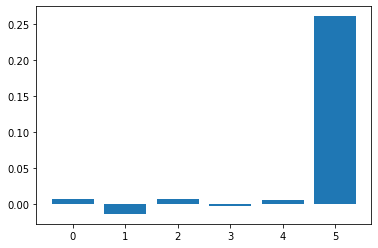

In [213]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X=df[['Ball Possession %','Pass Accuracy %','Fouls Committed','On target %','Blocked %','Goal Scored']]
y=df['Result']
model.fit(X,y)
importance = model.coef_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Here after the finding the importance between the feature and selection I came to know that my pass accuracy has a negative importance in getting the final result. So I will not include that in my model building.

## In order to make my model perform better. I am scaling my data. 

In [214]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[['Ball Possession %','Fouls Committed','On target %','Blocked %','Goal Scored']]=sc.fit_transform(df[['Ball Possession %','Fouls Committed','On target %','Blocked %','Goal Scored']])
df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,On target %,Blocked %,Result
0,14-06-2018,Russia,Saudi Arabia,3.194193,-0.960492,13,7,3,3,6,3,11,0,78,306,118,1.837216,0,0,0,Yes,12.0,Group Stage,No,0,0.0,NaN,1.627425,-0.171058,2
1,14-06-2018,Saudi Arabia,Russia,-1.146112,0.961994,6,0,3,3,2,1,25,2,86,511,105,-0.770884,0,0,0,No,NaN,Group Stage,No,0,0.0,NaN,-2.239640,1.834923,1
2,15-06-2018,Egypt,Uruguay,-1.146112,-0.672119,8,3,3,2,0,1,7,3,78,395,112,-0.336200,2,0,0,No,NaN,Group Stage,No,0,0.0,NaN,0.453495,-0.027774,1
3,15-06-2018,Uruguay,Egypt,-0.278051,0.673621,14,4,6,4,5,1,13,3,86,589,111,-1.640250,0,0,0,Yes,89.0,Group Stage,No,0,0.0,NaN,-0.187728,0.238326,2
4,15-06-2018,Morocco,Iran,-1.146112,1.346491,13,3,6,4,5,0,14,2,86,433,101,1.837216,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0,-0.582326,0.402079,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,-0.278051,-0.383746,11,1,6,4,4,3,24,5,79,479,148,0.098483,1,0,0,No,5.0,Semi- Finals,No,0,0.0,NaN,-1.586759,0.818906,1
124,14-07-2018,Belgium,England,0.590010,-0.672119,12,4,3,5,4,1,5,5,88,510,108,-0.553542,1,0,0,Yes,4.0,3rd Place,No,0,0.0,NaN,0.154258,1.214024,2
125,14-07-2018,England,Belgium,-1.146112,0.673621,15,5,7,3,5,0,12,2,92,698,110,-1.857592,2,0,0,No,NaN,3rd Place,No,0,0.0,NaN,0.154258,-0.400313,1
126,15-07-2018,France,Croatia,2.326132,-1.056616,8,6,1,1,2,1,14,1,75,271,99,0.098483,2,0,0,Yes,18.0,Final,No,0,1.0,18.0,3.146630,-0.959122,2


## I am taking my features into X and target is taken into y. 



In [215]:
X=df[['Ball Possession %','Fouls Committed','On target %','Blocked %','Goal Scored']]
y=df['Result']
print(X,y)

     Ball Possession %  Fouls Committed  On target %  Blocked %  Goal Scored
0            -0.960492         1.837216     1.627425  -0.171058     3.194193
1             0.961994        -0.770884    -2.239640   1.834923    -1.146112
2            -0.672119        -0.336200     0.453495  -0.027774    -1.146112
3             0.673621        -1.640250    -0.187728   0.238326    -0.278051
4             1.346491         1.837216    -0.582326   0.402079    -1.146112
..                 ...              ...          ...        ...          ...
123          -0.383746         0.098483    -1.586759   0.818906    -0.278051
124          -0.672119        -0.553542     0.154258   1.214024     0.590010
125           0.673621        -1.857592     0.154258  -0.400313    -1.146112
126          -1.056616         0.098483     3.146630  -0.959122     2.326132
127           1.058118        -0.118859    -0.803301   0.096406     0.590010

[128 rows x 5 columns] 0      2
1      1
2      1
3      2
4      1
      .

## I am dividing my complete data into training and testing data. So I am importing train_test_split module and I am trying to divide my data into two divisions. training dataset and testing dataset.

In [216]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

## I am performing the logistic Regression in order to predict. I got 69 percent accuracy. And also I want my model to have more performance. So I increased the maximum number of iterations to 1000. the default value here would be 100


In [217]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
print(model.max_iter)
model.score(X_test,y_test)

1000


0.6923076923076923

## I am plotting the confustion matrix for the logistic model. This can tell me where my model was failing or where my model was performing well. 

Text(69.0, 0.5, 'Truth')

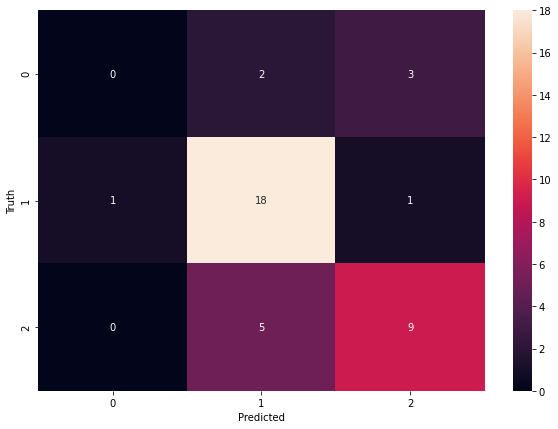

In [218]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## logistic regression model was able to predict more accurately when matches are lossed. So this would be better in finding the result to predict the loss. 

## I am Performing the decision tree for the same data set. And I got 64 percent accuracy. 

In [219]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
model.score(X_test,y_test)

0.6153846153846154

## confusion matrix for the decision tree classifier. 

Text(69.0, 0.5, 'Truth')

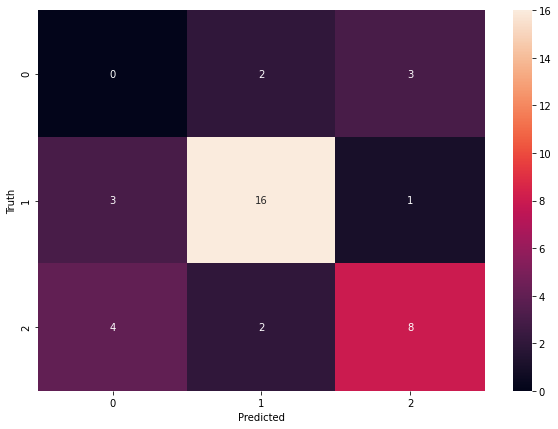

In [220]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## random forest model. From this I got accuracy of 58 percent. 


In [221]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
model.score(X_test,y_test)

0.6153846153846154

## confusion matrix for the Random forest model. 

Text(69.0, 0.5, 'Truth')

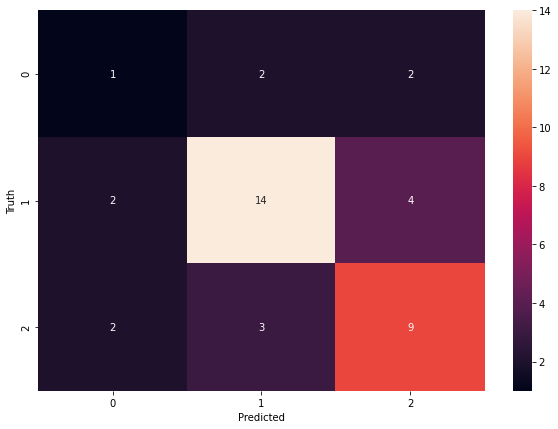

In [222]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# This is the last model I have used. this is the support vector machine model. This model is having the highest accuracy among all the three models with accuaracy of 71 pecent. 

In [223]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
model.score(X_test,y_test)

0.717948717948718

## this is confusion matrix of the SVM 

Text(69.0, 0.5, 'Truth')

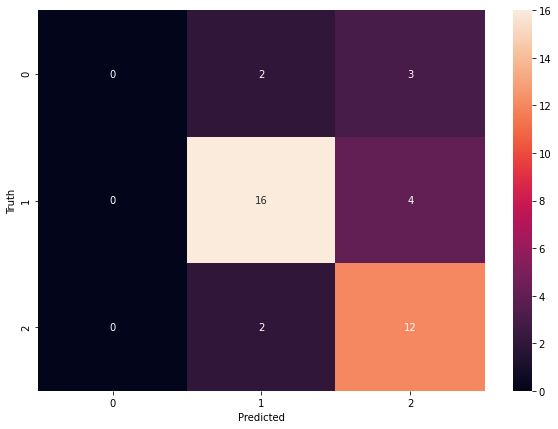

In [224]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## In my feature selection I actually included goals scored also. It is obvious that goals scored will be actually give the final result. If a team scores more goals then that team would be winning the game. So it is main factor that affects everything. 

## so for that purpose I have excluded the goals scored this time. Now let us see how my svm performs. 

In [225]:
X=df[['Ball Possession %','Fouls Committed','On target %','Blocked %']]
y=df['Result']

In [226]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [227]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
model.score(X_test,y_test)

0.4358974358974359

## my model gave me an accuracy of 43 percent. This means by seeing the performances like ball possession, fouls committed and on target. We can't actually guess the result. 

## So I can say that all my models actually worked really well. Though the accuracy was only 43 percent, it is really true that in games like football one min of game will definitely change the total result. That is why they say that each and every minute is important. Having these facts in mind I can conclude that though a team plays well for 85 min and plays it bad for last 5 min, they will loss the game. But though the other factors have less importance in the result of the game, but still they might be some key factors in the game. 

# My Contributions


1.  I have added a new column of Result to my dataset so that that would be used to make predictions. 
2.  Finding the best model which actually suits the given dataset
3.  Wins or losses will not depend on the goals scored alone. But they will have less contribution in deciding my result.
4.  I have done the feature scaling of my dataset.
5.  I have found the importance between the features in my dataset. 


